# (NYC Airbnb data exploration)
## by (Iqra Qamar)

## Preliminary Wrangling

> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

#### Columns list
- idlisting: ID
- name: name of the listing
- host_id: host ID
- host_name: name of the host
- neighbourhood_group: location
- neighbourhood: area
- latitude: latitude coordinates
- longitude: longitude coordinates
- room_type: listing space type
- price: price per night in dollars
- minimum_nights: minimum number of nights a guest can stay for the rental
- number_of_reviews: number of reviews
- last_review: latest review
- reviews_per_month: number of reviews per month
- calculated_host_listings_count: amount of listing per host
- availability_365: number of days when listing is available for booking

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


> The dataset contains of 48895 records and 16 columns. Some columns have missing values such as name, host_name, last_review and reviews_per_month. 

### main feature(s) of interest in the dataset:
* price of a listing
* traffic among different areas

### feautres to be investigated:

> number_of_reviews, neighborhood, calculated_host_listings, availability_365 & room_type.

From the above data exploration, it can be seen that some minimum price is zero. Since this seems to be bad data. These records will be removed from the dataset.

#### Assess

In [45]:
df.query('price == 0')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_perc


**Clean the 11 records with 0 price.**

#### Clean

In [7]:
df = df.query('price > 0')

#### Test

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Assess

missing values for reviews per month and last review

#### Code

In [46]:
df[df['reviews_per_month'].isnull()]['number_of_reviews'].value_counts()

0    10051
Name: number_of_reviews, dtype: int64

In [47]:
df[df['last_review'].isnull()]['number_of_reviews'].value_counts()

0    10051
Name: number_of_reviews, dtype: int64

**reviews per month and last review are null when listing had no reviews. The records with missing values will therefore be kept in the dataset**

## Univariate Exploration


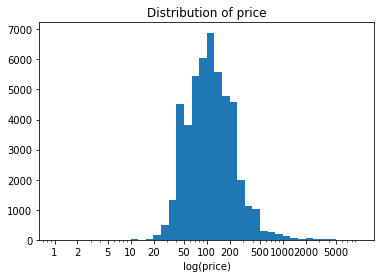

In [9]:
bin_edges = 10 ** np.arange(0, np.log10(df['price']).max()+0.1, 0.1)
plt.hist(data = df, x = 'price', bins = bin_edges)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000,5000]
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('log(price)')
plt.title('Distribution of price');

> The price was transformed to log. The distribution of price is bimodal with a the first peak at 40 and the next one at 150.

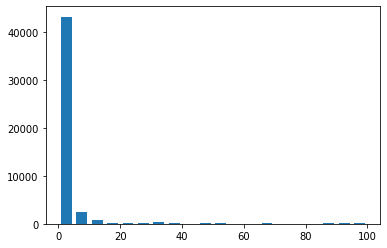

In [53]:
bin_edges = np.arange(0, 100+5, 5)
plt.hist(data = df, x = 'calculated_host_listings_count', bins = bin_edges, rwidth = 0.7);

> The distribution of calculated host listings is skewed to the right as hosts cannot have less than 0 lisitings and some hosts have a large numbers of listings. The maximum being 327. Most of the hosts in the data set have between 0 to 5 properties. 

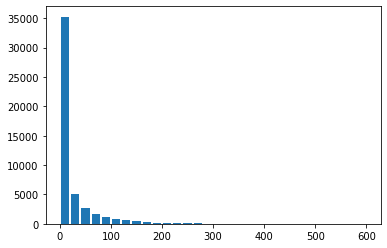

In [11]:
bin_edges = np.arange(0, 600+20, 20)
plt.hist(data = df, x = 'number_of_reviews', bins = bin_edges, rwidth = 0.8);

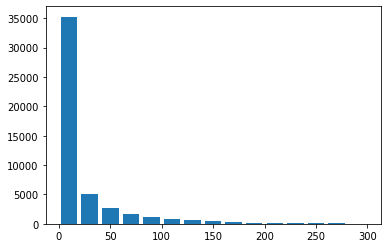

In [12]:
bin_edges = np.arange(0, 300+20, 20)
plt.hist(data = df, x = 'number_of_reviews', bins = bin_edges, rwidth = 0.8);

> The distribution of number of reviews is skewed to the right as well because reviews cannot also be less than 0 and some listings have a large number of reviews in the dataset.

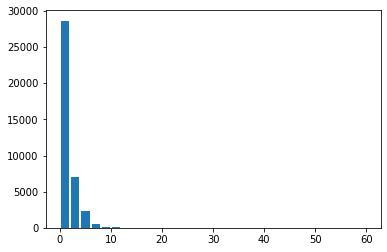

In [43]:
bin_edges = np.arange(0, df['reviews_per_month'].max()+2, 2)
plt.hist(data = df, x = 'reviews_per_month', bins = bin_edges, rwidth = 0.8);

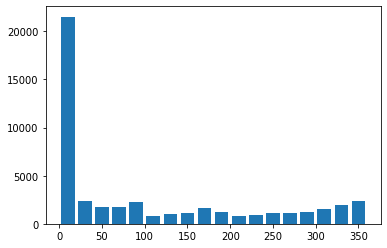

In [13]:
bin_edges = np.arange(0, 350+20, 20)
plt.hist(data = df, x = 'availability_365', bins = bin_edges, rwidth = 0.8);

> Most of the listings in the dataset are available only for between 0 to 20 days range in a year. 

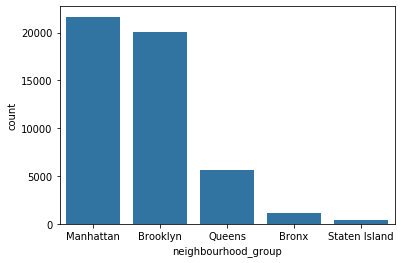

In [14]:
# which neighbourhood_groups had the most listings
base_color = sb.color_palette()[0]
cat_order = df['neighbourhood_group'].value_counts().index
sb.countplot(data = df, x = 'neighbourhood_group', color = base_color, order = cat_order);

> The majority of the listings are in Manhattan, followed by Brooklyn.

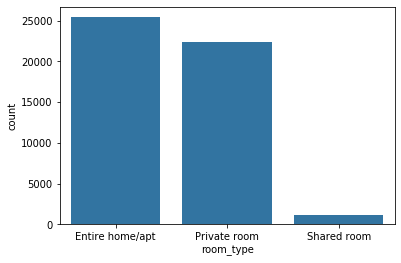

In [15]:
# what is the distribution of room types in the dataset
base_color = sb.color_palette()[0]
cat_order = df['room_type'].value_counts().index
sb.countplot(data = df, x = 'room_type', color = base_color, order = cat_order);

> The majority of listings are entire home or apartments, followed by private rooms.

> The price was transformed to log as the distribution of price looked highly skewed with a lots of points with low values. After the lograthimic transformation, the data follows a bimodal distribution.

## Bivariate Exploration


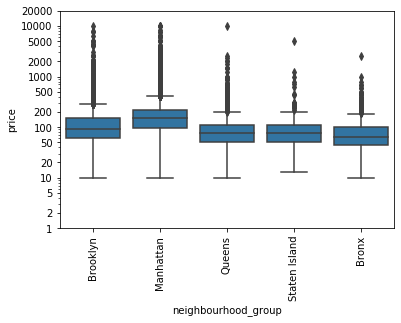

In [16]:
# exploring relationship between price and neigbourhood group.
sb.boxplot(data = df, x = 'neighbourhood_group', y = 'price', color = base_color)
plt.xticks(rotation = 90)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000,20000]
plt.yscale('log')
plt.yticks(ticks,ticks);

> The prices of listings in Manhattan are on average higher than prices of listings in other neighbourhoods, followed by Brooklyn. Additionally, the variation in prices of listings is also more within Manhattan and within Brooklyn as can be seen by longer whiskers. 

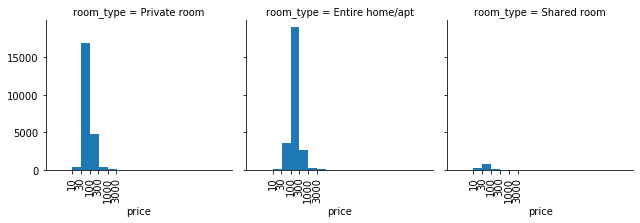

In [17]:
bin_edges = 10 ** np.arange(0, np.log(df['price']).max()+0.5, 0.5)
g = sb.FacetGrid(data = df, col = 'room_type')
g.map(plt.hist, 'price', bins = bin_edges)
ticks = (10,30,100,300,1000,3000)
plt.xscale('log')
plt.xticks(ticks,ticks)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

> the average price of entire apartments is more than average price of private rooms or shared rooms.

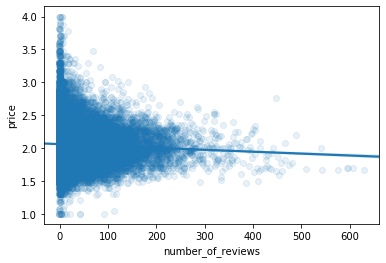

In [18]:
# exploring relationship between price and number of reviews.
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(data=df, x= df['number_of_reviews'], y = df['price'].apply(log_trans),
          x_jitter = 0.2, scatter_kws = {'alpha' : 1/10});

> There seems to be a slighly negative relationship between price and number of reviews.

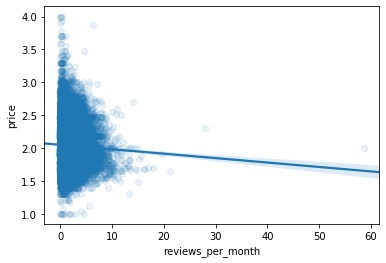

In [44]:
sb.regplot(data=df, x= df['reviews_per_month'], y = df['price'].apply(log_trans),
          x_jitter = 0.2, scatter_kws = {'alpha' : 1/10});

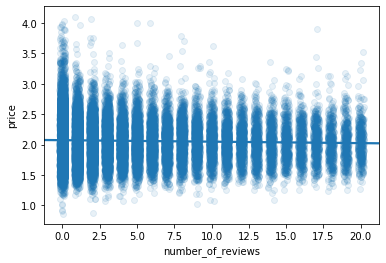

In [19]:
df_2 = df.query('number_of_reviews <= 20')
sb.regplot(data=df_2, x= df_2['number_of_reviews'], y = df_2['price'].apply(log_trans),
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/10})

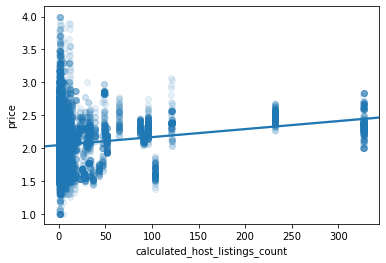

In [20]:
sb.regplot(data=df, x= df['calculated_host_listings_count'], y = df['price'].apply(log_trans),
          x_jitter = 0.2, scatter_kws = {'alpha' : 1/10});

> There seems to be a positive relationship between price and calculated host listings i.e. more listings a host has the higher the price of their listings tend to be.

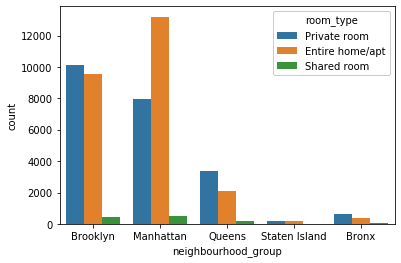

In [21]:
ax = sb.countplot(data = df, x = 'neighbourhood_group', hue = 'room_type')
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'room_type');

> The dataset has most listings of entire apartments in Manhattan, followed by private rooms in Brooklyn. In Brooklyn, Queens and Bronx the number of private room listings are more than the number of entire apartment listings but the reverse is true in Manhattan. Staten Island has the least amount of listings.

In [55]:
# calcuating availability of a listing in percentage
df['availability_perc'] = (df['availability_365']/365)*100

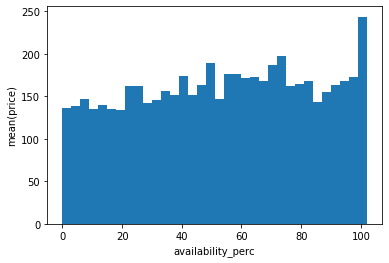

In [23]:
bin_edges = np.arange(0, df['availability_perc'].max()+3, 3)

# count number of points in each bin
bin_idxs = pd.cut(df['availability_perc'], bin_edges, right = False, include_lowest = True,
                  labels = False)
pts_per_bin = df.groupby(bin_idxs).size()

num_var_wts = df['price'] / pts_per_bin[bin_idxs].values

# plot the data using the calculated weights
plt.hist(data = df, x = 'availability_perc', bins = bin_edges, weights = num_var_wts)
plt.xlabel('availability_perc')
plt.ylabel('mean(price)');

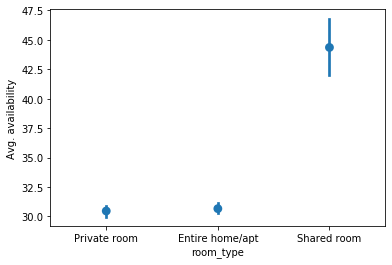

In [24]:
sb.pointplot(data = df, x = 'room_type', y = 'availability_perc', linestyles = "")
plt.ylabel('Avg. availability');

> The percentage availability of shared rooms is the highest in the dataset. That means shared rooms were available for more days in a year than other types of rooms.

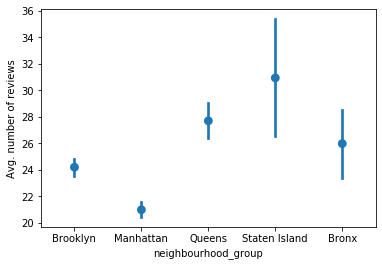

In [25]:
sb.pointplot(data = df, x = 'neighbourhood_group', y = 'number_of_reviews', linestyles = "")
plt.ylabel('Avg. number of reviews');

> Listings in Staten Island had more reviews on average, however, this is most likely due to the fact that the Staten Island has fewer listing in the data. Manhattan with the highest number of listings, therefore shows a lower average.

* The price varied with neighbourhood, room type, calculated host listings and number of reviews.
* The relationship between number of reviews and price seems to be negative even though I expected listings with more reviews to have a higher price. However, since we are not able to differentiate between whether the review was good or bad, it is not possible to breakdown the distribution by the review type. 

## Multivariate Exploration


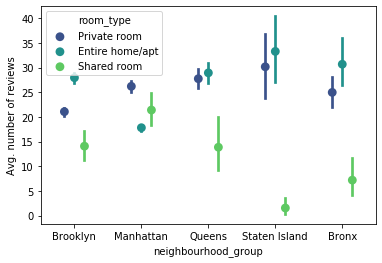

In [26]:
ax = sb.pointplot(data = df, x = 'neighbourhood_group', y = 'number_of_reviews', hue = 'room_type', palette = 'viridis',
                  dodge = 0.3, linestyles = "")
plt.ylabel('Avg. number of reviews');

> The breakdown of reviews by neighbourhood and room type shows that the less expensive neighborhoods and less expensive room types in Manhattan had more reviews on average which could be one reason of the negative relationship observed between price and and number of reviews.

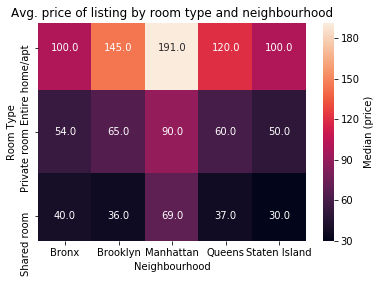

In [61]:
cat_means = df.groupby(['neighbourhood_group', 'room_type']).median()['price']
cat_means = cat_means.reset_index(name = 'price_avg')
cat_means = cat_means.pivot(index = 'room_type', columns = 'neighbourhood_group',
                            values = 'price_avg')
ax = sb.heatmap(cat_means, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'Median (price)'})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.3, top - 0.3)
plt.xlabel('Neighbourhood')
plt.ylabel('Room Type')
plt.title ('Avg. price of listing by room type and neighbourhood');

> Entire apartments in Manhattan were the most expensive on average, followed by entire apartments in Brooklyn. However, shared rooms in Manhattan had a higher price on average than private rooms in Brooklyn. Shared rooms in Staten Island had the least price on average.

/Users/iqraqamar/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


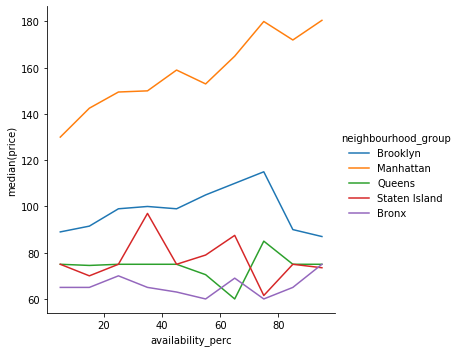

In [28]:
def median_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    medians = y.groupby(data_bins).median()

    # create plot
    plt.errorbar(x = bin_centers, y = medians, **kwargs)

bin_edges = np.arange(0, df['availability_perc'].max()+10, 10)
g = sb.FacetGrid(data = df, hue = 'neighbourhood_group', size = 5)
g.map(median_poly, "availability_perc", "price", bins = bin_edges)
g.set_ylabels('median(price)')
g.add_legend();

> The more available the listing was, the higher price it had on average in Manhattan. However, The same pattern cannot be observed in other neighborhoods.

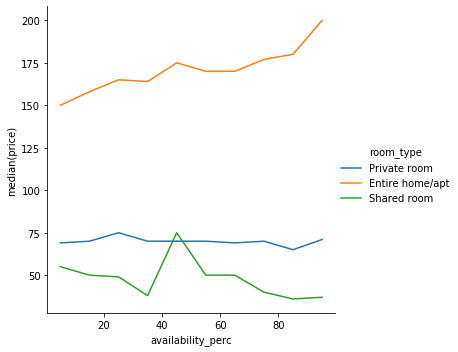

In [29]:
bin_edges = np.arange(0, df['availability_perc'].max()+10, 10)
g = sb.FacetGrid(data = df, hue = 'room_type', size = 5)
g.map(median_poly, "availability_perc", "price", bins = bin_edges)
g.set_ylabels('median(price)')
g.add_legend();

> The median price increases with the availability of entire apartments. For private rooms, the median price remained stable with different availability and for shared rooms a spike in median price can be observed for listings that are available around 38 to 42% of the days in the year.

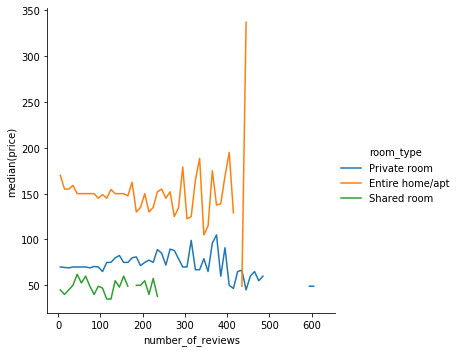

In [30]:
bin_edges = np.arange(0, df['number_of_reviews'].max()+10, 10)
g = sb.FacetGrid(data = df, hue = 'room_type', size = 5)
g.map(median_poly, "number_of_reviews", "price", bins = bin_edges)
g.set_ylabels('median(price)')
g.add_legend();

> Price were highest for entire apartments in Manhattan. Additionally, the prices of listing in Manhattan or of entire apartments increased with availability of listing.

> The breakdown of reviews by neighbourhood and room type shows that the less expensive neighborhoods and less expensive room types in Manhattan had more reviews on average which could be one reasons of the negative relationship observed between price and number of reviews.